<a href="https://colab.research.google.com/github/BimaBayuUWUUU/PCVK_Ganjil_2023/blob/main/KEL1_KUIS2PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Anggota Kelompok 1 :**

1. 2141720185 - Adam Rafi Rezandi
2. 2141720003 - Tio Misbaqul Irawan
3. 2141720019 - Bima Bayu Saputra
4. 2141720036 - Lailatul Badriyah
5. 2141720046 - Andi Dwi Prastyo

---
# **Kuis 2 Praktikum**
---

1. Mengerjakan secara kelompok yang terdiri dari 5 anggota
2. Kumpulkan e-ktp anggota keluarga atau kelas pada kelompok minimal 5 buah sebagai dataset. 1 foto bisa berbagai pose ketika pengambilan foto e-ktp.
4. Deteksi dan kenali foto wajah e-ktp tersebut menggunakan metode yang telah dipelajari baik pada matakulilah PCVK ataupun matakuliah lain pada semester ini.
3. Presentasikan di depan kelas hasil dari pekerjaan kelompok Anda, paparkan hasil dari pekerjaan tersebut secara detail lengkap dengan tangkapan layar bagian dari; (1)pre-processing, (2)lokalisasi, (3)segmentasi, dan (4)pengenalan.
5. Jangan lupa upload juga kode program tersebut pada repository
6. Kumpulkan link file presentasi dalam bentuk pdf dan link repository.

In [127]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab import drive
from google.colab.patches import cv2_imshow
import glob
import imutils

In [128]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [165]:
ktp_images = []
for img in glob.glob('/content/drive/MyDrive/PCVK/KTPKEL1/*'):
   n = cv2.imread(img)
   n = imutils.resize(n,width=640)
   ktp_images.append(n)

In [166]:
thresh_ktp_images=[]
for ktp in ktp_images:
  gray = cv2.cvtColor(ktp,cv2.COLOR_RGB2GRAY)
  blurred = cv2.GaussianBlur(gray,(3,3),0)
  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(12, 12))
  clahed = clahe.apply(blurred)
  thresholded = cv2.threshold(clahed,165,255,cv2.THRESH_TRUNC + cv2.THRESH_OTSU)[1]
  kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
  opened =cv2.morphologyEx(thresholded,cv2.MORPH_OPEN, kernel, iterations=1)
  thresh_ktp_images.append(thresholded)

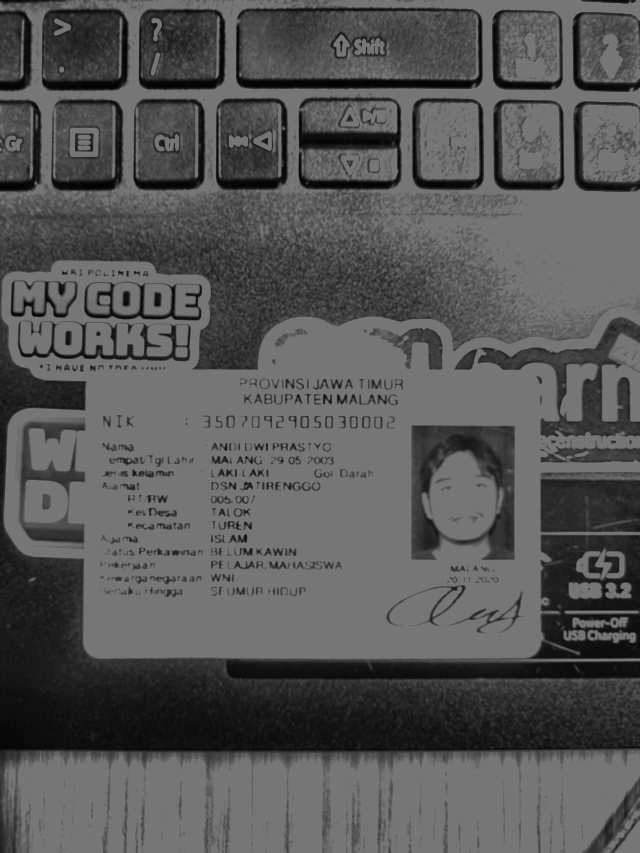

In [167]:
cv2_imshow(thresh_ktp_images[2])

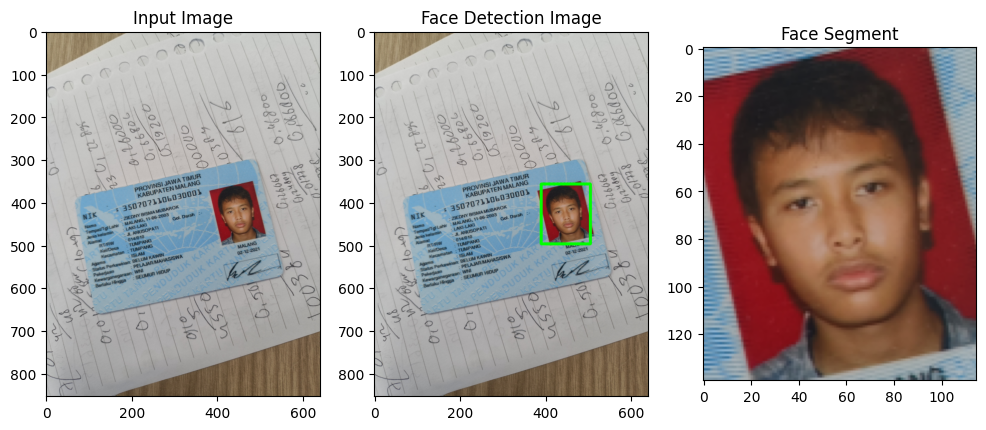

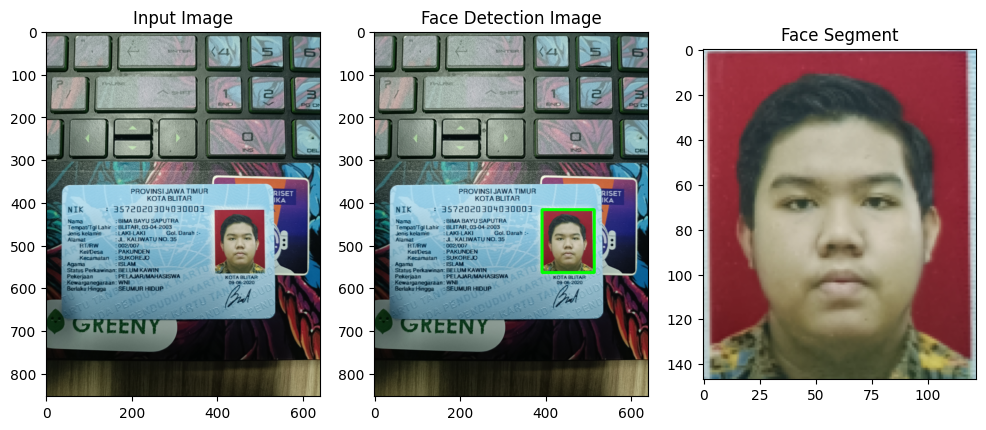

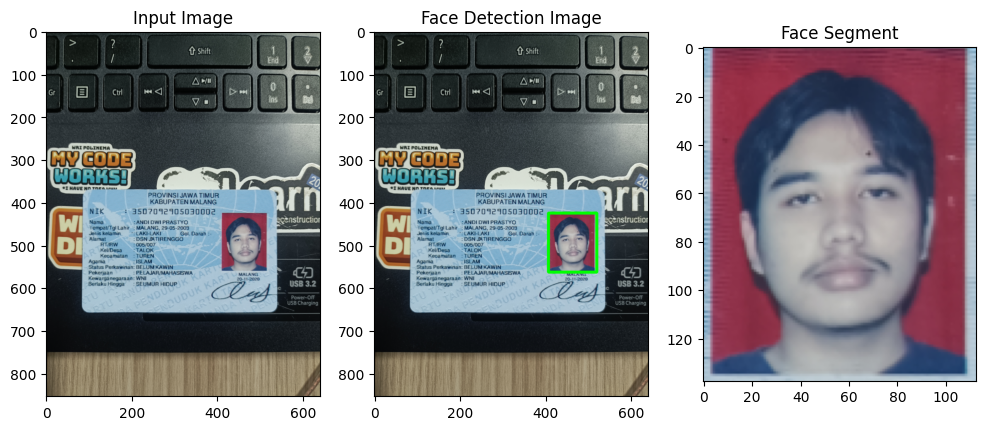

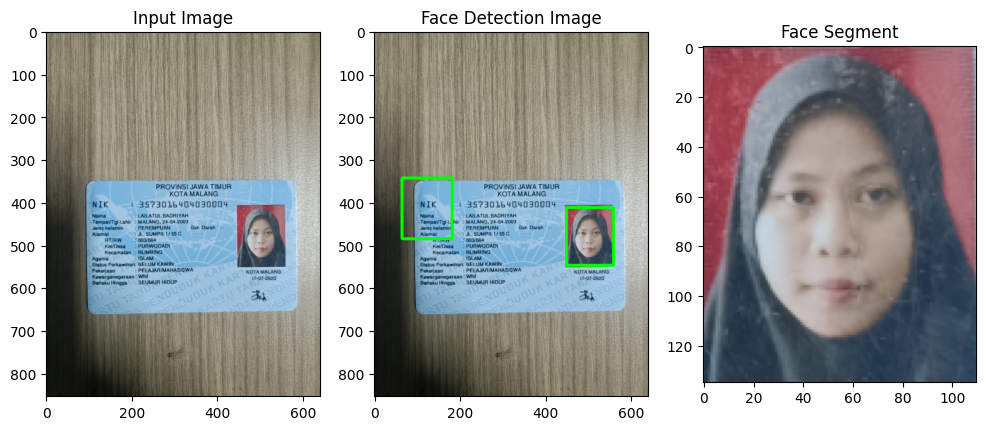

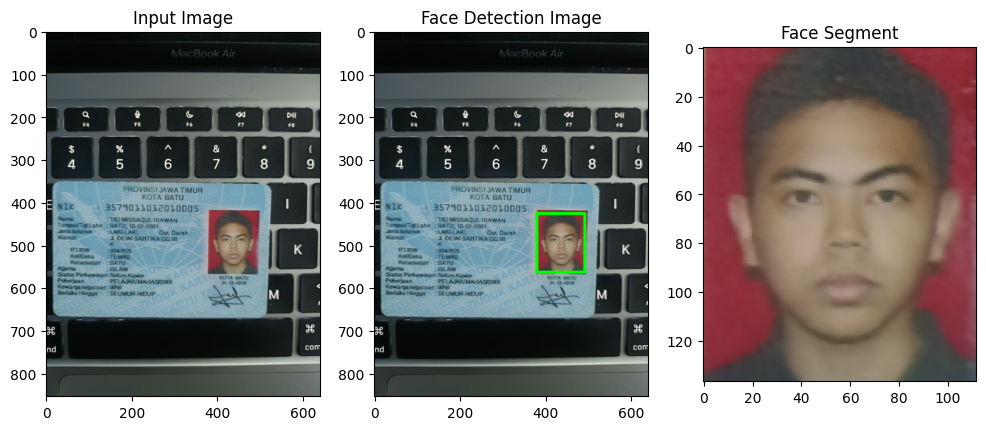

In [183]:
haar_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/PCVK/P12/haarcascades/haarcascade_frontalface_alt.xml')
mn = [5, 5, 5, 2, 5, 3, 5, 5, 5]
sc = [1.2, 1.2, 1.2, 1.2, 1.6, 1.1, 2, 1.2, 1.2]
face_segments = []

for i, ktp in enumerate(ktp_images):
    facedet_img = ktp.copy()
    faces_rects = haar_cascade.detectMultiScale(ktp, scaleFactor=sc[i], minNeighbors=mn[i])

    for (x, y, w, h) in faces_rects:
        cv2.rectangle(facedet_img, (x-15, y-30), (x+w+15, y+h+25), (0, 255, 0), 5)
        face_segment = ktp[y-30:y+h+25, x-15:x+w+15]

    face_segments.append(face_segment)

    plt.figure(figsize=(12, 8))
    plt.subplot(131), plt.imshow(cv2.cvtColor(ktp, cv2.COLOR_BGR2RGB)), plt.title('Input Image')
    plt.subplot(132), plt.imshow(cv2.cvtColor(facedet_img, cv2.COLOR_BGR2RGB)), plt.title('Face Detection Image')
    plt.subplot(133), plt.imshow(cv2.cvtColor(face_segment, cv2.COLOR_BGR2RGB)), plt.title('Face Segment')
    plt.show()

In [184]:
from keras.models import load_model

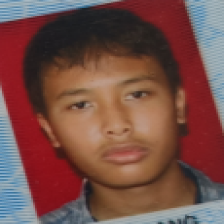

1/1 [==============================] - 2s 2s/step
[[0.00034051 0.00742558 0.00008432 0.00184631 0.9903032 ]]
Class: adam
Confidence Score: 99 %


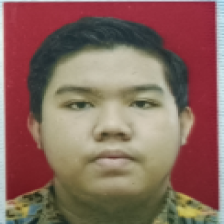

1/1 [==============================] - 0s 46ms/step
[[0.00030637 0.00031394 0.01426742 0.97654814 0.00856419]]
Class: bima
Confidence Score: 98 %


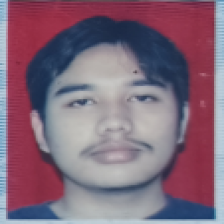

1/1 [==============================] - 0s 43ms/step
[[0.00028762 0.00951068 0.8165109  0.0011101  0.17258064]]
Class: andi
Confidence Score: 82 %


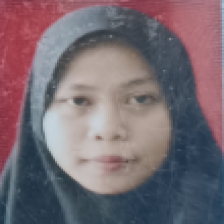

1/1 [==============================] - 0s 49ms/step
[[0.00000037 0.9927785  0.00000759 0.00000019 0.00721334]]
Class: laila
Confidence Score: 99 %


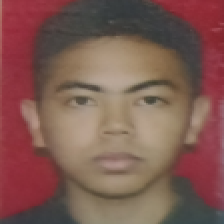

1/1 [==============================] - 0s 45ms/step
[[0.7988933  0.00006344 0.01442445 0.00018733 0.18643145]]
Class: tio
Confidence Score: 80 %


In [185]:
# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = load_model("/content/drive/MyDrive/PCVK/keras_model.h5", compile=False)

# Load the labels
class_names = open("/content/drive/MyDrive/PCVK/labels.txt", "r").readlines()

for face_segment in face_segments:
  # Resize the raw image into (224-height,224-width) pixels
  image = cv2.resize(face_segment, (224, 224), interpolation=cv2.INTER_AREA)

  # Show the image in a window
  cv2_imshow(image)

  # Make the image a numpy array and reshape it to the models input shape.
  image = np.asarray(image, dtype=np.float32).reshape(1, 224, 224, 3)

  # Normalize the image array
  image = (image / 127.5) - 1

  # Predicts the model
  prediction = model.predict(image)

  print(prediction)
  index = np.argmax(prediction)
  class_name = class_names[index]
  confidence_score = prediction[0][index]

  # Print prediction and confidence score
  print("Class:", class_name[2:], end="")
  print("Confidence Score:", str(np.round(confidence_score * 100))[:-2], "%")
